# Anchor boxes

Se pude usar k-means para encontrar las anchor boxes mas probables y usarlas como priors

![](anchor-boxes-kmeans.jpeg)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [4]:
reduced_dataset_folder = '/home/usuario/repos/Object_Localization/challenge_dataset_v3_no_test/'
train_folder = reduced_dataset_folder + '/images/train'
val_folder = reduced_dataset_folder + '/images/val'
annotations_dict_train = np.load(reduced_dataset_folder+'/annotations_train.npy').flat[0]
annotations_dict_val = np.load(reduced_dataset_folder+'/annotations_val.npy').flat[0]
classes = list(annotations_dict_train.keys())
print(classes)

['n02165456', 'n02226429', 'n01644373', 'n02279972', 'n01632458', 'n02256656', 'n01774384', 'n01770393']


In [5]:
widths = []
heights = []
widths_by_class = {}
heights_by_class = {}
for class_ in classes:
    widths_by_class[class_]=[]
    heights_by_class[class_]=[]

for k, v in annotations_dict_train.items():
    for k2, v2 in v.items():
        width = (v2['bounding_boxes'][0][2]-v2['bounding_boxes'][0][0])/v2['width']
        widths.append(width)
        widths_by_class[k].append(width)
        height = (v2['bounding_boxes'][0][3]-v2['bounding_boxes'][0][1])/v2['height']
        heights.append(height)
        heights_by_class[k].append(height)
widths = np.array(widths)
heights = np.array(heights)

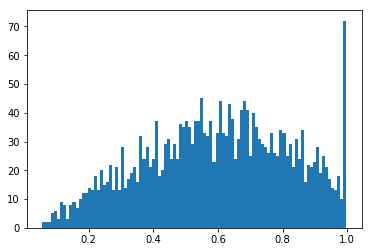

In [7]:
from matplotlib import pyplot as plt
plt.hist(heights, bins=100)
plt.show()

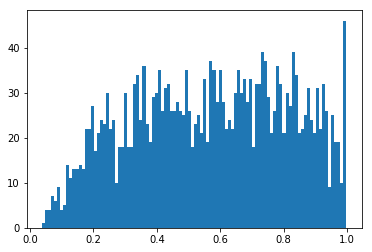

In [8]:
plt.hist(widths, bins=100)
plt.show()

In [9]:
aspect_ratios = widths/heights

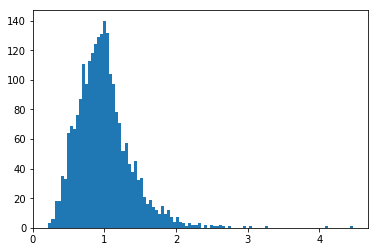

In [10]:
plt.hist(aspect_ratios, bins=100)
plt.show()

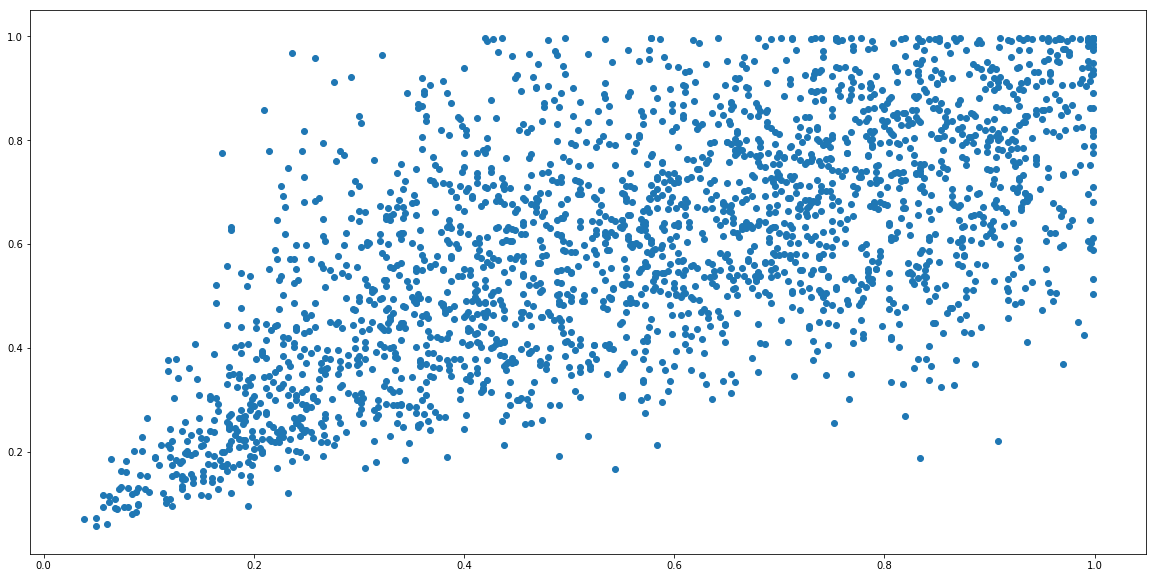

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(widths, heights)

In [12]:
classes_names = {
    'n02165456': 'Vaquita de san antonio',
    'n02226429': 'grillo',
    'n01644373': 'sapo',
    'n02279972': 'mariposa',
    'n01632458': 'salamandra',
    'n02256656': 'chicharra',
    'n01774384': 'viuda negra',
    'n01770393': 'escorpion'
}

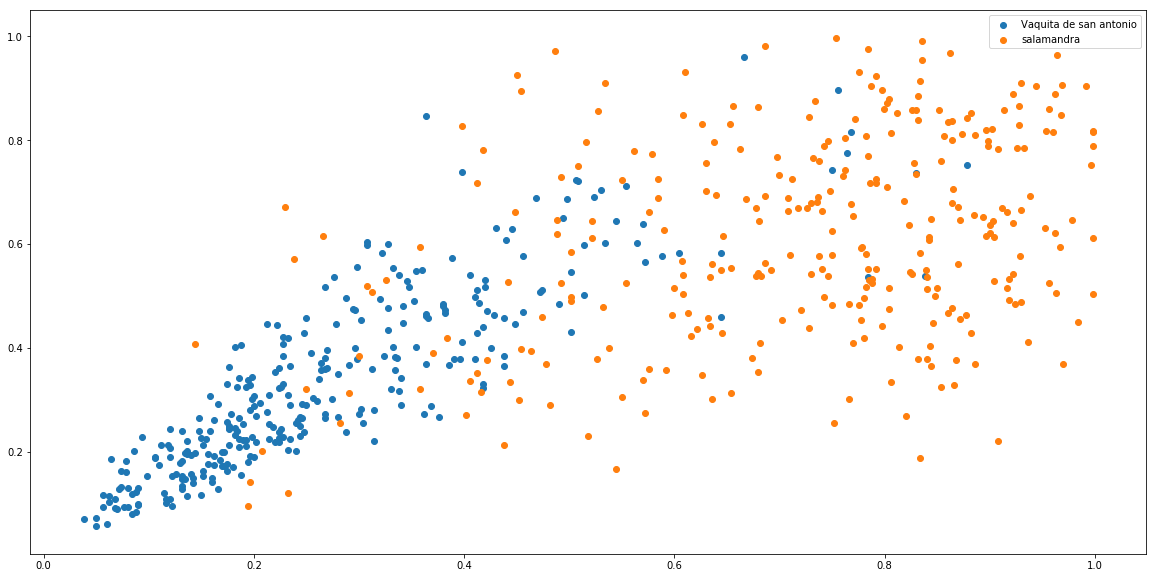

In [13]:
colors = ['r', 'g', 'b']
plt.figure(figsize=(20,10))
c=0
for i, (k, v) in enumerate(widths_by_class.items()):
    if k in ['n02165456', 'n01632458']:
        plt.scatter(widths_by_class[k], heights_by_class[k], label=classes_names[k])
        c=c+1
plt.legend()
plt.show()

Se ven dos cosas:
- Aspect Ratio de Vaquitas de San Antonio es menos variable
- Los tamanos de las Vaquitas de San Antonio son mas pequeños

In [14]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [15]:
datagen_train = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)

train_generator = datagen_train.flow_from_directory(
    classes = ['n02226429', 'n02165456'],
    directory=train_folder,
    target_size=(320,320),
    color_mode="rgb",
    batch_size=40,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 600 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'n02226429': 0, 'n02165456': 1}

[1. 0.]


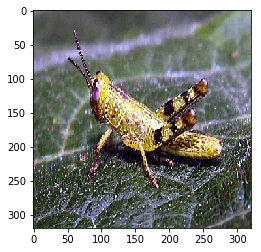

[0. 1.]


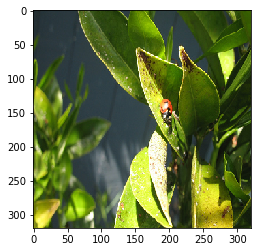

[0. 1.]


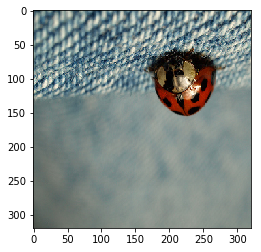

[1. 0.]


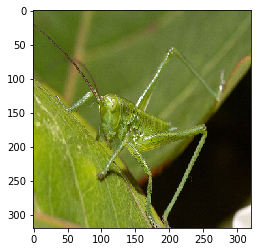

[1. 0.]


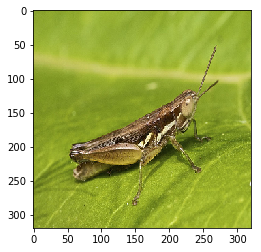

[1. 0.]


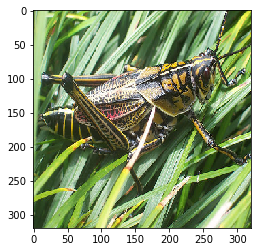

[1. 0.]


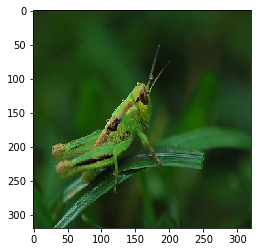

[0. 1.]


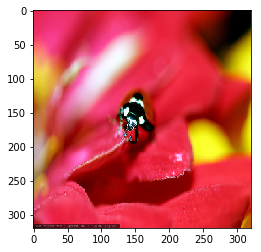

[1. 0.]


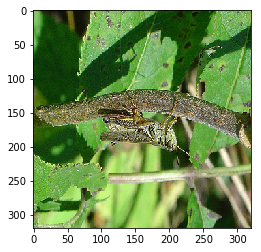

[0. 1.]


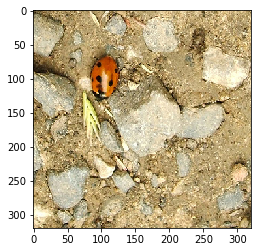

[1. 0.]


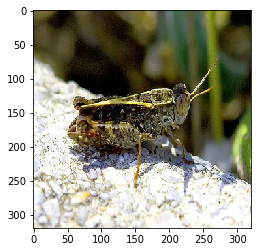

[1. 0.]


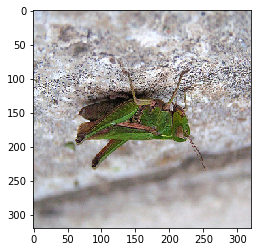

[1. 0.]


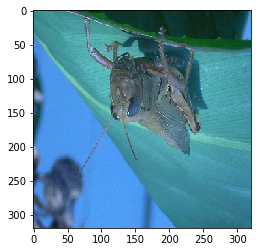

[0. 1.]


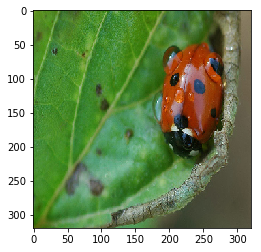

[0. 1.]


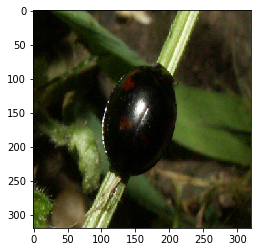

[1. 0.]


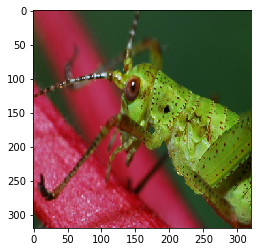

[1. 0.]


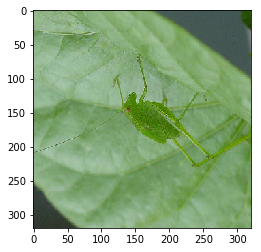

[1. 0.]


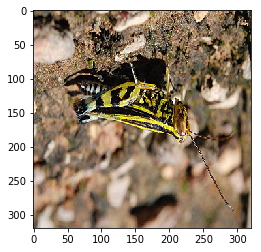

[1. 0.]


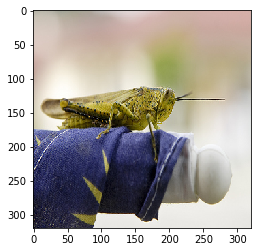

[1. 0.]


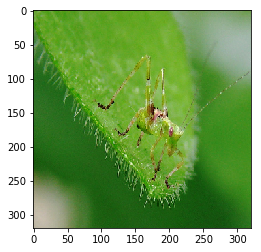

[1. 0.]


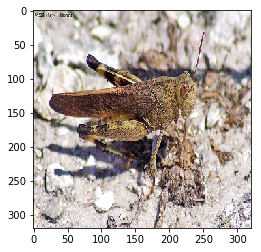

[0. 1.]


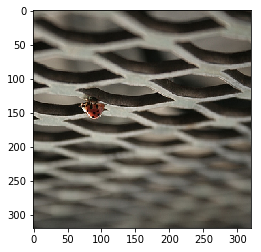

[0. 1.]


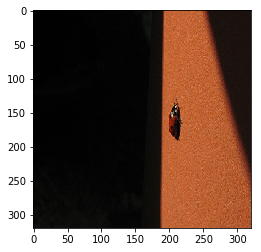

[0. 1.]


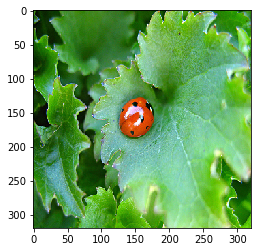

[0. 1.]


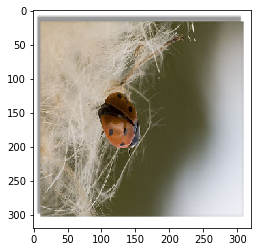

[0. 1.]


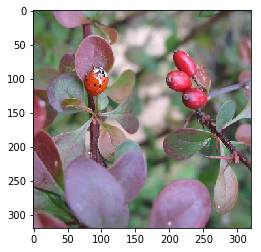

[1. 0.]


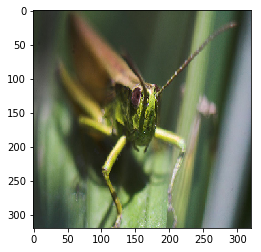

[1. 0.]


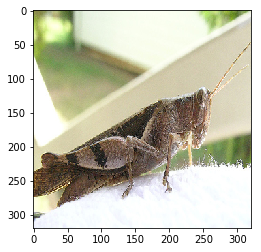

[0. 1.]


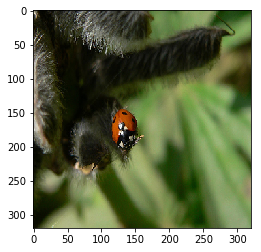

[0. 1.]


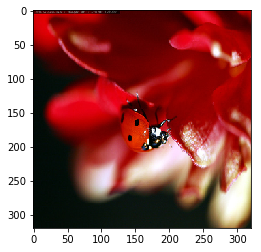

[0. 1.]


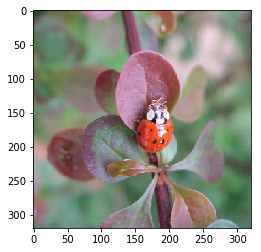

[1. 0.]


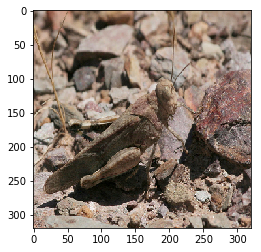

[1. 0.]


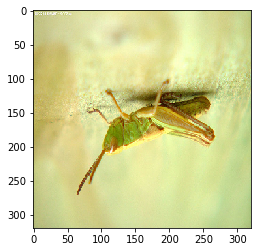

[1. 0.]


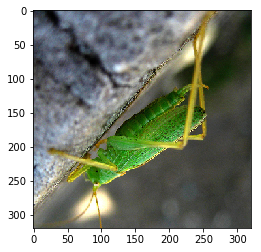

[1. 0.]


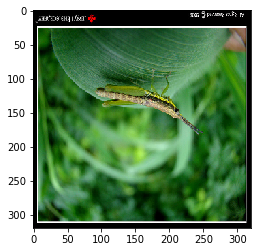

[0. 1.]


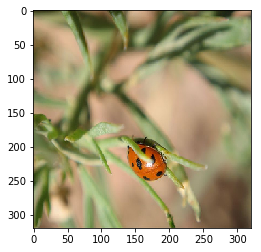

[1. 0.]


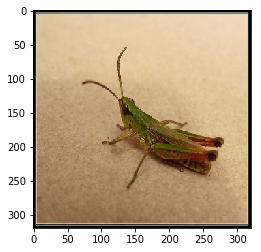

[0. 1.]


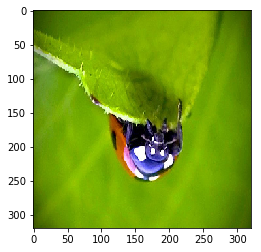

[0. 1.]


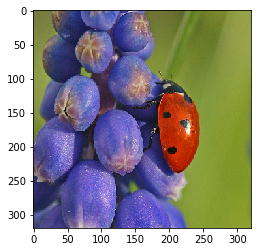

[1. 0.]


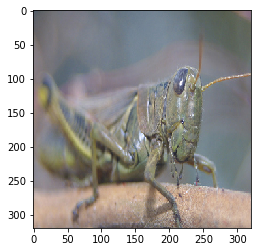

In [17]:
images, labels = next(train_generator)
for i, image in enumerate(images):
    print(labels[i])
    plt.imshow(image)
    plt.show()